Análise de Dados de Fatura de Cartão de Crédito
Lógica
 - Instalar, ler e usar as bibliotecas
 - Ler a fatura e organiza-la (fatura.csv)
 - Gerar informações relevantes

Instalar as Libs
 - pandas
 - matplotlib

In [2]:
#Usar as libs
import pandas as pd
import matplotlib.pyplot as plt



Ler a base de dados e organiza-la

In [12]:
dados = pd.read_csv('fatura.csv')
#dados.head(10)
#dados.tail(10)
#dados.info()
display(dados)

,Nome,NumeroCartao,data_compra,hora_compra,categoria,estabelecimento,ValorCompra
0,Ana,4745654042586681,2024-05-08,18:46:33,Vestuário,Loja de Roupas,53.21
1,Carlos,374149440690652,2024-04-22,03:00:47,Farmácia,Loja de Suplementos,159.70
2,Carlos,374149440690652,2024-05-16,22:19:36,Lazer,Show,114.56
3,Maria,374604561384428,2024-05-06,01:13:57,Mercado,Supermercado,101.21
4,Joao,2298930723413634,2024-04-18,02:08:58,Mercado,Mercado,32.03
...,...,...,...,...,...,...,...
95,Ana,4745654042586681,2024-04-01,09:10:23,Alimentação,Cafeteria,203.84
96,Maria,374604561384428,2024-04-23,06:57:51,Transporte,Táxi,33.37
97,Ana,4745654042586681,2024-04-10,11:04:09,Eletrônicos,E-commerce,119.85
98,Maria,374604561384428,2024-05-04,14:42:45,Lazer,Cinema,87.73


Iniciar o processo de análise

In [29]:
# Valor total da fatura
valor_total_cartao = dados['ValorCompra'].sum()
valor_fatura = f"{valor_total_cartao:_.2f}".replace('.', ',').replace('_', '.')
print(f"O valor total da fatura é: R${valor_fatura}")

O valor total da fatura é: R$14.811,75


Valor Gasto por Titular/pessoa

In [33]:
valor_gasto_por_titular = dados.groupby('Nome')['ValorCompra'].sum().reset_index().sort_values('ValorCompra', ascending=False)
valor_gasto_por_titular

,Nome,ValorCompra
0,Ana,5763.10
1,Carlos,3701.59
3,Maria,2784.91
2,Joao,2562.15


Valor gasto por categoria

In [34]:
valor_gasto_por_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values('ValorCompra', ascending=False)
valor_gasto_por_categoria

,categoria,ValorCompra
0,Alimentação,2460.06
1,Eletrônicos,2350.01
5,Transporte,2186.05
7,Viagem,1893.79
6,Vestuário,1739.94
2,Farmácia,1714.60
4,Mercado,1495.00
3,Lazer,972.30


Dias que mais ocorreram gastos

In [37]:
gastos_por_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index().sort_values(by= 'data_compra', ascending=False)
gastos_por_dia

,data_compra,ValorCompra
42,2024-05-16,490.62
41,2024-05-15,595.99
40,2024-05-14,77.94
39,2024-05-13,641.62
38,2024-05-12,469.56
37,2024-05-11,379.79
36,2024-05-10,213.34
35,2024-05-09,428.60
34,2024-05-08,807.59
33,2024-05-07,118.43


Gastos por pessoa ou titular

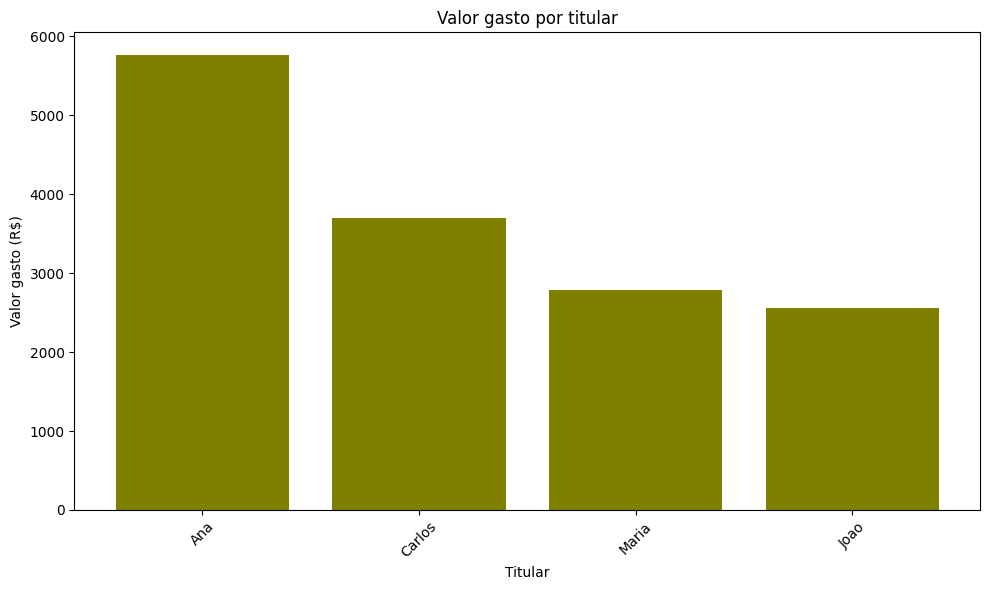

In [47]:
plt.figure(figsize=(10,6))
plt.bar(valor_gasto_por_titular["Nome"], valor_gasto_por_titular["ValorCompra"], color='olive')
plt.title('Valor gasto por titular')
plt.xlabel('Titular')
plt.ylabel('Valor gasto (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gráfico de gastos por Categoria

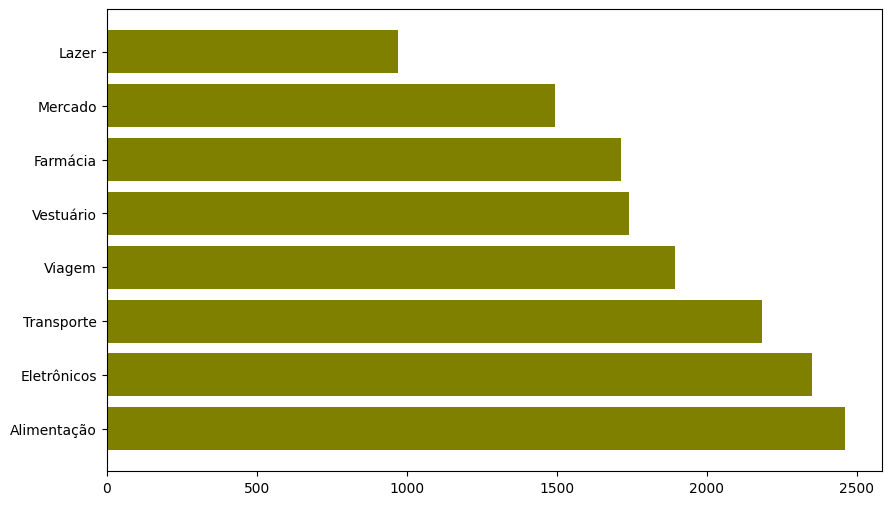

In [49]:
plt.figure(figsize=(10,6))
plt.barh(valor_gasto_por_categoria["categoria"], valor_gasto_por_categoria["ValorCompra"], color='olive')
plt.show()

Gráfico dos Gastos por Titular

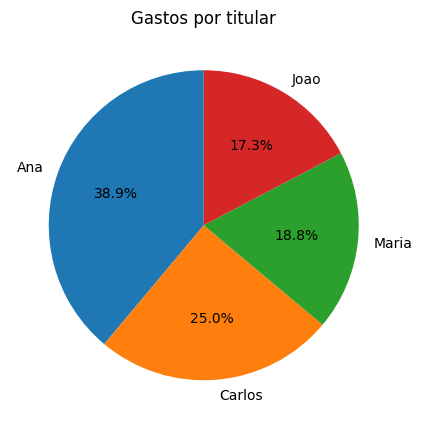

In [55]:
plt.figure(figsize=(5,6))
plt.pie(valor_gasto_por_titular["ValorCompra"], labels=valor_gasto_por_titular["Nome"], autopct='%1.1f%%', startangle=90)
plt.title('Gastos por titular')
plt.show()